In [1]:

from crystaldiskmark_parser.parser import parse_df

import matplotlib.pyplot as plt

In [2]:
df = parse_df("../test/data/CrystalDiskMark_20210622162528 WD Blue 3D 1TB WDS100T2B0A.txt")
print(df)

                  date                              test  \
0  2021/06/22 17:19:21  1 GiB (x5) [E: 96% (894/932GiB)]   
1  2021/06/22 17:19:21  1 GiB (x5) [E: 96% (894/932GiB)]   
2  2021/06/22 17:19:21  1 GiB (x5) [E: 96% (894/932GiB)]   
3  2021/06/22 17:19:21  1 GiB (x5) [E: 96% (894/932GiB)]   
4  2021/06/22 17:19:21  1 GiB (x5) [E: 96% (894/932GiB)]   
5  2021/06/22 17:19:21  1 GiB (x5) [E: 96% (894/932GiB)]   
6  2021/06/22 17:19:21  1 GiB (x5) [E: 96% (894/932GiB)]   
7  2021/06/22 17:19:21  1 GiB (x5) [E: 96% (894/932GiB)]   

                             time                                    os  \
0  Measure 5 sec / Interval 5 sec  Windows 10  [10.0 Build 19042] (x64)   
1  Measure 5 sec / Interval 5 sec  Windows 10  [10.0 Build 19042] (x64)   
2  Measure 5 sec / Interval 5 sec  Windows 10  [10.0 Build 19042] (x64)   
3  Measure 5 sec / Interval 5 sec  Windows 10  [10.0 Build 19042] (x64)   
4  Measure 5 sec / Interval 5 sec  Windows 10  [10.0 Build 19042] (x64)   
5  Measur

In [3]:
#  Read to one big DataFrame
df = parse_df("../test/data/CrystalDiskMark_20210622162528 WD Blue 3D 1TB WDS100T2B0A.txt")
df = df.append(parse_df("../test/data/CrystalDiskMark_20210622163451 SAMSUNG 840 EVO 120GB.txt"))
df = df.append(parse_df("../test/data/CrystalDiskMark_20210626154221 Crucial P2 2TB on H87M.txt"))
df = df.append(parse_df("../test/data/CrystalDiskMark_20210627172807 Crucial P2 2TB on X370.txt"))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 7
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            32 non-null     object 
 1   test            32 non-null     object 
 2   time            32 non-null     object 
 3   os              32 non-null     object 
 4   mode            32 non-null     object 
 5   profile         32 non-null     object 
 6   comment         32 non-null     object 
 7   read_write      32 non-null     object 
 8   type            32 non-null     object 
 9   blocksize       32 non-null     float64
 10  unit_blocksize  32 non-null     object 
 11  queues          32 non-null     object 
 12  threads         32 non-null     object 
 13  rate            32 non-null     float64
 14  unit_rate       32 non-null     object 
 15  iops            32 non-null     float64
 16  unit_iops       32 non-null     object 
 17  latency         32 non-null     float6

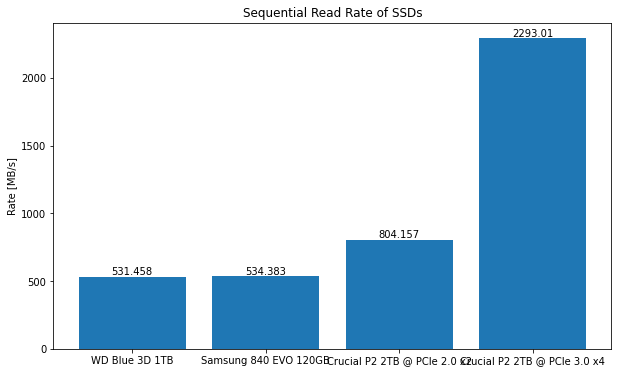

In [86]:
# Extract relevant rows
data = df.loc[(df['read_write'] == 'read')
              & (df['type'] == "SEQ")
              & (df['queues'] == 8)
              & (df['blocksize'] == 1)
              & (df['unit_blocksize'] == "MiB")]

# Extract relevant columns
rate = data["rate"]
name = data["comment"]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
con = ax.bar(name, rate)
ax.bar_label(con)
ax.set_title("Sequential Read Rate of SSDs")
ax.set_ylabel("Rate [MB/s]")

fig.savefig('./plots/example1.png', bbox_inches='tight')
plt.show()

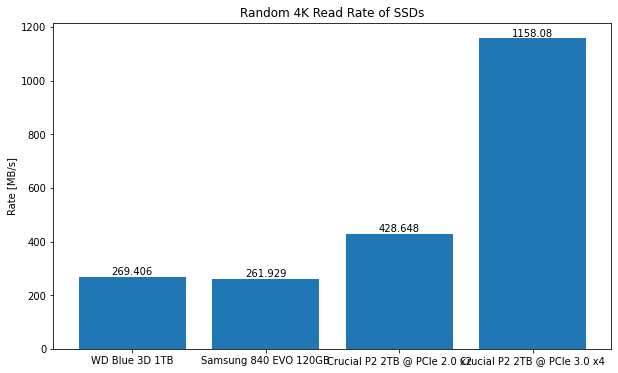

In [87]:
# Extract relevant rows
data = df.loc[(df['read_write'] == 'read')
              & (df['type'] == "RND")
              & (df['blocksize'] == 4)
              & (df['unit_blocksize'] == "KiB")
              & (df['queues'] == 32)]

# Extract relevant columns
rate = data["rate"]
name = data["comment"]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
con = ax.bar(name, rate)
ax.bar_label(con)
ax.set_title("Random 4K Read Rate of SSDs")
ax.set_ylabel("Rate [MB/s]")

fig.savefig('./plots/example2.png', bbox_inches='tight')
plt.show()


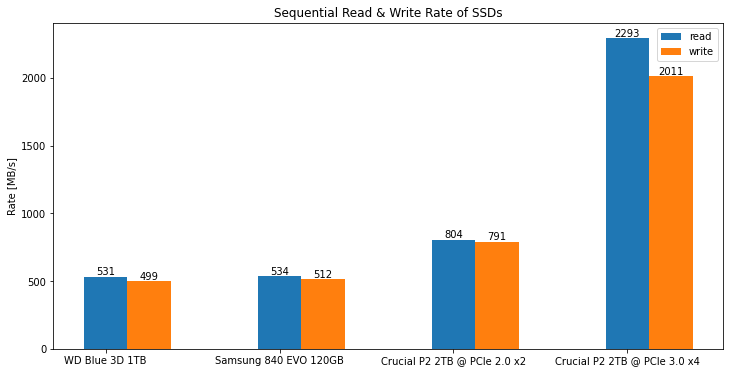

In [90]:
# Extract relevant rows
data = df.loc[(df['read_write'] == 'read')
              & (df['type'] == "SEQ")
              & (df['queues'] == 8)
              & (df['blocksize'] == 1)
              & (df['unit_blocksize'] == "MiB")]

# Extract relevant columns
read_rate = data["rate"]
read_rate = [round(x) for x in read_rate]
name = data["comment"]

# Extract relevant rows
data = df.loc[(df['read_write'] == 'write')
              & (df['type'] == "SEQ")
              & (df['queues'] == 8)
              & (df['blocksize'] == 1)
              & (df['unit_blocksize'] == "MiB")]

# Extract relevant columns
write_rate = data["rate"]
write_rate = [round(x) for x in write_rate]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
con = ax.bar([float(x)  + .25 for x in  range(len(read_rate))], read_rate, tick_label=name, width = 0.25)
ax.bar_label(con)
con = ax.bar([float(x)  + .5 for x in  range(len(write_rate))], write_rate, width = 0.25)
ax.bar_label(con)
ax.set_title("Sequential Read & Write Rate of SSDs")
ax.set_ylabel("Rate [MB/s]")
plt.legend(["read", "write"])
fig.savefig('./plots/example3.png', bbox_inches='tight')
plt.show()